# Lab 3 - Fixed Point Iterations
## February 6 - February 11, 2023
## Student 1 Name: Dhruv Shah Student 1 ID No: 202103017
## Student 2 Name: Pranav Patel Student 2 ID No: 202103040
## Student 3 Name: Vatsal Shah Student 3 ID No: 202103022
## Date of Submission: $\underline{19/02/23}$
***

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1 Consider the fixed point equation $x = g_c(x) = cx(1-x)$, with $c \neq 0$ constant. This is called the *Logistic Equation*. 
### Q.1(a) Find the non-zero fixed point $r_c$ of this function. 
### Q.1(b) For what values of $c$ will the fixed point iterations $x_{n+1} = g_c(x_n)$ converge to the above fixed point, when $x_0$ is sufficiently close to $r_c$.

###  <font color='red'> Ans. 1: Write your answer here
###  $A1(a): $ We solve for the non-zero fixed point, where $g_{c}(x) = x$ and we get $r_c = 1 - \frac{1}{c}$  
###  $A1(b): $ The fixed point iterations will converge to $r_c$ when $|g'(r_c)|< 1$. This gives us the range of $c$ as $(1,3)$.    

***
### Q.2: Write a function `myFP` that takes in the fixed point iteration function handle `g`, the initial point `x0` and performs the fixed point iterations $x_{n+1} = g(x_n)$ till the error estimate: $r - x_n = \frac{g'(c_n)}{1-g'(c_n)} (x_n - x_{n-1})$, goes below a set threshold. You can use the estimate $g'(c_n) \simeq \frac{x_n -x_{n-1}}{x_{n-1}-x_{n-2}}$ in order to estimate $r-x_n$. The function should return the sequence $\{x_n\}_{n=0}^{N}$.

In [61]:
# def myFP(g,x0):
def myFP(g, x0):
    err = 1
    x_n = []
    X_n = []  # x_n+1 
    itr = []
    x1 = g(x0)
    x2 = g(x1)
    iter = 2
    x_n = np.append(x_n, [x0, x1, x2])
    itr = np.append(itr, [0,1,2])
    while (err > 10e-20):
        dg = (x2 - x1)/ (x1 - x0)
        err = dg/(1 - dg) * (x2 - x1)
        x0 = x1 
        x1 = x2 
        x2 = g(x2)
        iter = iter + 1
        itr = np.append(itr , iter)
        x_n = np.append(x_n, x2)
    return itr, x_n

### Q.2(a) For a few fixed point iteration functions like the one given in Q.1, $g(x) = \frac{1}{2}\exp(-x), g(x) = \frac{\sin(x)+1}{2}$, analytically find the fixed point, if any, and whether the fixed point iterations will converge to the fixed point assuming the initial estimate $x_0$ is close enough to the fixed point. For each $g(x)$ given, plot $x_n$ against $n$.

In [62]:
## Run myFP for the examples given in the question, and plot x_n against n.
def g(x):
    return 0.5 * np.exp(-x)

def g1(x):
    return 0.5 * (np.sin(x)+ 1)

n, x_n = myFP(g,0)
n2, x_n2 = myFP(g1, 1)

Text(0, 0.5, 'x_n')

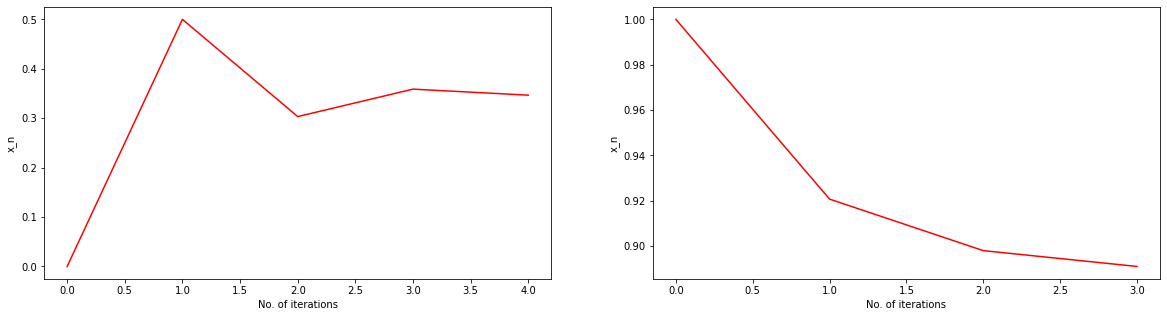

In [69]:
# Plot the graph of x_n vs n
# print(x,y)
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(n, x_n, color = 'r')
ax[0].set_xlabel('No. of iterations')
ax[0].set_ylabel('x_n')

ax[1].plot(n2, x_n2, color = 'r')
ax[1].set_xlabel('No. of iterations')
ax[1].set_ylabel('x_n')


### <font color="red"> Ans 2(a) Write your observations here <font>
Here we can see that depending upon the value of the $x_0$ the function  converges to fixed point of the function $g(x)$. 

***
### Q.3 Write functions `myaitken` and `mysteffenson` that take in a function handle `g`, the initial point $x_0$, and estimate the fixed point using the Aitken's extrapolation method, and the Steffenson's iteration, respectively, and return the corresponding sequences $\{x_n\}_{n=0}^{N}$. The iterations can be stopped using a criteria similar to the one used in Q.2

In [47]:
# Aitken's extrapolation Method
# def myaitken(g,x0):
def myaitken(g,x0):
  err = 1
  x_n = []
  X_n = []  # x_n+1 
  itr = []
  x1 = g(x0)
  x2 = g(x1)
  iter = 2
  x_n = np.append(x_n, [x0, x1, x2])
  x_bar = []
  itr = np.append(itr, [0,1,2])
  while (err > 10e-16):
      dg = (x2 - x1)/ (x1 - x0)
      err = dg/(1 - dg) * (x2 - x1)
      
      x2_bar = x2 + (dg/(1 - dg)) * (x2 - x1)
      x_bar = np.append(x_bar, x2_bar)
      
      x0 = x1
      x1 = x2 

      x2 = g(x2)
      iter = iter + 1
      itr = np.append(itr , iter)
      x_n = np.append(x_n, x2)
  return itr, x_n, x_bar

# Steffenson's iterations
# def mysteffenson(g,x0):
def mysteffenson(g,x0):
  err = 1
  x_n = []
  X_n = []  # x_n+1 
  itr = []
  x1 = g(x0)
  x2 = g(x1)
  iter = 2
  x_n = np.append(x_n, [x0, x1, x2])
  x_bar = []
  itr = np.append(itr, [0,1,2])
  while (err > 10e-16):
      dg = (x2 - x1)/ (x1 - x0)
      err = dg/(1 - dg) * (x2 - x1)

      x2_bar = x2 + (dg/(1 - dg)) * (x2 - x1)

      x_bar = np.append(x_bar, x2_bar)
      
      x0 = x1
      x1 = x2       
      x2 = x2_bar
      iter = iter + 1
      itr = np.append(itr , iter)
      x_n = np.append(x_n, x2)

  return itr, x_n, x_bar

### Q.3(a) Using <font color="red"> your own <font> <font color="black">choice of a few functions $g$, compare the convergence of the sequences $\{x_n\}$ generated by `myFP`, `myaitken`, and `mysteffenson`

The corresponding sequence for g(x) is  [0.         0.5        0.30326533 0.36920157 0.34564303]
The corresponding sequence for g1(x) is  [1.         0.92073549 0.89802349 0.89104838]


Text(0, 0.5, 'x_n')

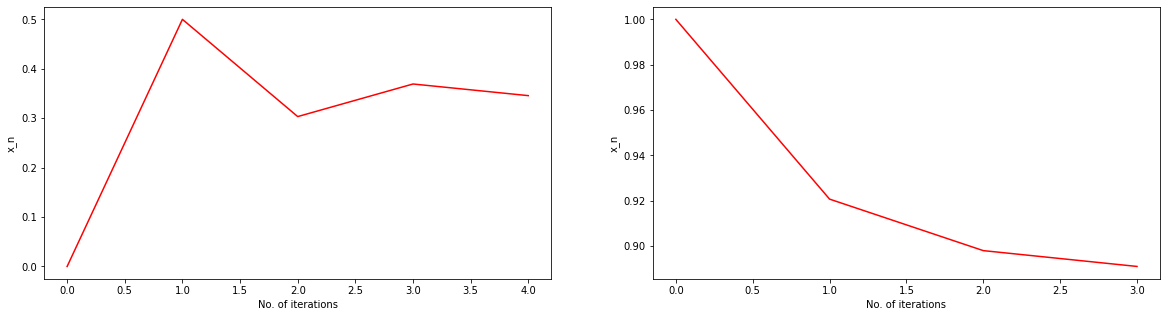

In [76]:
# Define a few functions 'g' and compare myFP, myaitken and mysteffenson
n3, x_n3, x_bar3 = myaitken(g,0)
print("The corresponding sequence for g(x) is ", x_n3)
n4, x_n4, x_bar4 = myaitken(g1,1)
print("The corresponding sequence for g1(x) is ", x_n4)
fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(n3, x_n3, color = 'r')
ax[0].set_xlabel('No. of iterations')
ax[0].set_ylabel('x_n')

ax[1].plot(n4, x_n4, color = 'r')
ax[1].set_xlabel('No. of iterations')
ax[1].set_ylabel('x_n')

The corresponding sequence for g(x) is  [0.         0.5        0.30326533 0.35881665 0.3465847 ]
The corresponding sequence for g1(x) is  [1.         0.92073549 0.89802349 0.88890214]


Text(0, 0.5, 'x_n')

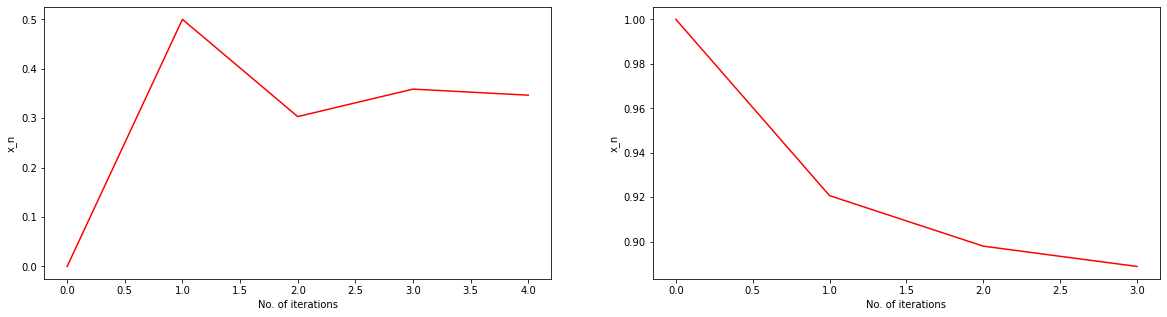

In [77]:
n5, x_n5, x_bar5 = mysteffenson(g,0)
print("The corresponding sequence for g(x) is ", x_n5)

n6, x_n6, x_bar6 = mysteffenson(g1,1)
print("The corresponding sequence for g1(x) is ", x_n6)


fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(n5, x_n5, color = 'r')
ax[0].set_xlabel('No. of iterations')
ax[0].set_ylabel('x_n')

ax[1].plot(n6, x_n6, color = 'r')
ax[1].set_xlabel('No. of iterations')
ax[1].set_ylabel('x_n')
